In [29]:
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn
import numpy
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored
from sklearn.preprocessing import StandardScaler

In [30]:
data = pandas.read_csv('../ThiTHPT2018.csv')
data.drop(columns='Unnamed: 10', inplace=True)
data

C:\Users\Duy Long\AppData\Local\Temp\ipykernel_6168\802588370.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv('../ThiTHPT2018.csv')


,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien
0,1,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18,Bac Giang,Mien Bac
1,2,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.3,NaN,18,Bac Giang,Mien Bac
2,3,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75,18,Bac Giang,Mien Bac
3,4,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18,Bac Giang,Mien Bac
4,5,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18,Bac Giang,Mien Bac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,NaN,NaN,NaN,11.35,10.85,NaN,15.1,14.35,52,Ba Ria Vung Tau,Mien Nam
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,NaN,NaN,NaN,17.75,16.50,NaN,18,17.25,52,Ba Ria Vung Tau,Mien Nam
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,NaN,NaN,NaN,16.95,12.95,NaN,12.7,15.45,52,Ba Ria Vung Tau,Mien Nam
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,NaN,NaN,NaN,21.55,17.05,NaN,17.7,20.70,52,Ba Ria Vung Tau,Mien Nam


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SoBD,744396.0,372198.500000,214888.759829,1.0,186099.75,372198.50,558297.25,744396.00
Toan,741024.0,4.884162,1.440636,0.0,3.80,5.00,6.00,10.00
Van,728309.0,5.443449,1.447770,0.0,4.50,5.50,6.50,9.75
Anh,659998.0,3.933543,1.567942,0.0,2.80,3.60,4.60,10.00
Ly,323353.0,4.961179,1.531097,0.0,3.75,5.00,6.00,10.00
Hoa,326981.0,4.864391,1.523851,0.0,3.75,4.75,6.00,10.00
Sinh,319605.0,4.561249,1.244402,0.0,3.75,4.50,5.25,10.00
Su,446118.0,3.805371,1.241262,0.0,3.00,3.75,4.50,10.00
Dia,433221.0,5.483495,1.257440,0.0,4.75,5.50,6.25,10.00
GDCD,379034.0,7.157468,1.233368,0.0,6.50,7.25,8.00,10.00


In [32]:
data.isna().sum()

SoBD              0
Toan           3372
Van           16087
Anh           84398
Ly           421043
Hoa          417415
Sinh         424791
Su           298278
Dia          311175
GDCD         365362
KhoiA        423164
KhoiB        424880
KhoiC        311791
KhoiD         88043
KhoiA1       436532
Ma Tinh           0
Ten Tinh          0
Vung mien         0
dtype: int64

In [33]:
data1 = data.fillna(0)
data1.isna().sum()

SoBD         0
Toan         0
Van          0
Anh          0
Ly           0
Hoa          0
Sinh         0
Su           0
Dia          0
GDCD         0
KhoiA        0
KhoiB        0
KhoiC        0
KhoiD        0
KhoiA1       0
Ma Tinh      0
Ten Tinh     0
Vung mien    0
dtype: int64

**Phân cụm trên khối A**

In [34]:
khoia = data1[['Toan', 'Ly', 'Hoa', 'KhoiA']]
khoia

,Toan,Ly,Hoa,KhoiA
0,3.0,0.00,0.00,0.00
1,8.8,0.00,0.00,0.00
2,6.0,5.75,5.50,17.25
3,3.4,0.00,0.00,0.00
4,3.8,0.00,0.00,0.00
...,...,...,...,...
744391,4.6,3.75,3.00,11.35
744392,7.0,5.25,5.50,17.75
744393,5.2,6.25,5.50,16.95
744394,7.8,7.50,6.25,21.55


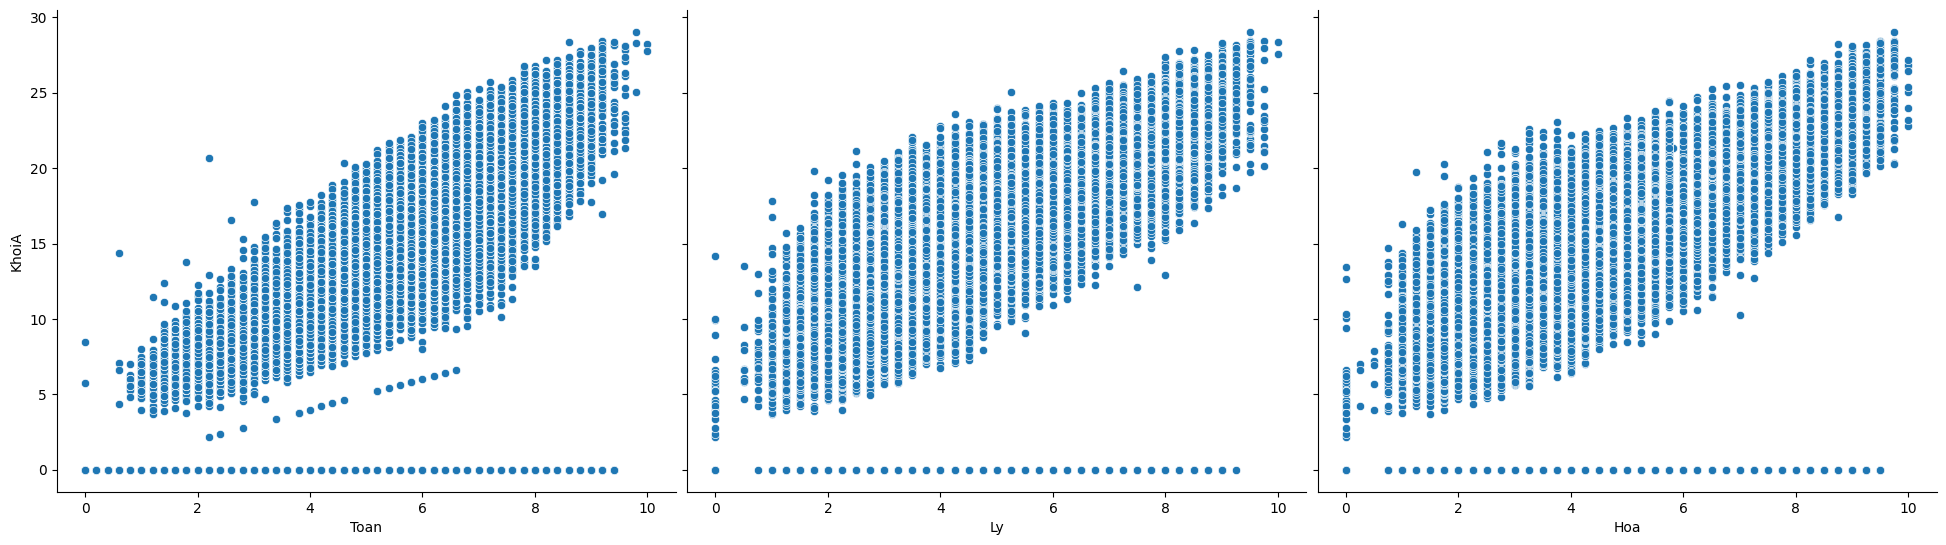

In [35]:
plt.figsize=(30, 10)
seaborn.pairplot(khoia, x_vars=['Toan', 'Ly', 'Hoa'], y_vars=['KhoiA'],height=5.5, aspect=1.2)

In [36]:
X_khoia = khoia.values
X_khoia
# sc = StandardScaler()

array([[ 3.  ,  0.  ,  0.  ,  0.  ],
       [ 8.8 ,  0.  ,  0.  ,  0.  ],
       [ 6.  ,  5.75,  5.5 , 17.25],
       ...,
       [ 5.2 ,  6.25,  5.5 , 16.95],
       [ 7.8 ,  7.5 ,  6.25, 21.55],
       [ 5.8 ,  6.25,  4.75, 16.8 ]])

In [37]:
clusters_khoia = 3
model = KMeans(init='k-means++', n_clusters=clusters_khoia, n_init=12)

In [38]:
model.fit(X_khoia)
labels = model.labels_

In [39]:
khoia['Cluster KhoiA'] = labels
khoia

C:\Users\Duy Long\AppData\Local\Temp\ipykernel_6168\1402985568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoia['Cluster KhoiA'] = labels


,Toan,Ly,Hoa,KhoiA,Cluster KhoiA
0,3.0,0.00,0.00,0.00,1
1,8.8,0.00,0.00,0.00,1
2,6.0,5.75,5.50,17.25,0
3,3.4,0.00,0.00,0.00,1
4,3.8,0.00,0.00,0.00,1
...,...,...,...,...,...
744391,4.6,3.75,3.00,11.35,2
744392,7.0,5.25,5.50,17.75,0
744393,5.2,6.25,5.50,16.95,0
744394,7.8,7.50,6.25,21.55,0


In [40]:
print(colored(khoia.groupby('Cluster KhoiA').describe(), attrs=['bold']))

                   Toan                                                \
                  count      mean       std  min  25%  50%  75%   max   
Cluster KhoiA                                                           
0              169156.0  6.468648  0.806125  2.2  6.0  6.4  7.0  10.0   
1              424198.0  4.221639  1.322161  0.0  3.4  4.2  5.2   9.4   
2              151042.0  4.861298  1.016151  0.0  4.2  5.0  5.6   8.2   

                     Ly            ...  Hoa            KhoiA             \
                  count      mean  ...  75%    max     count       mean   
Cluster KhoiA                      ...                                    
0              169156.0  5.965489  ...  6.5  10.00  169156.0  18.279283   
1              424198.0  0.025711  ...  0.0   9.50  424198.0   0.010930   
2              151042.0  3.867845  ...  4.5   7.75  151042.0  12.513064   

                                                            
                    std    min    25%    50%    7

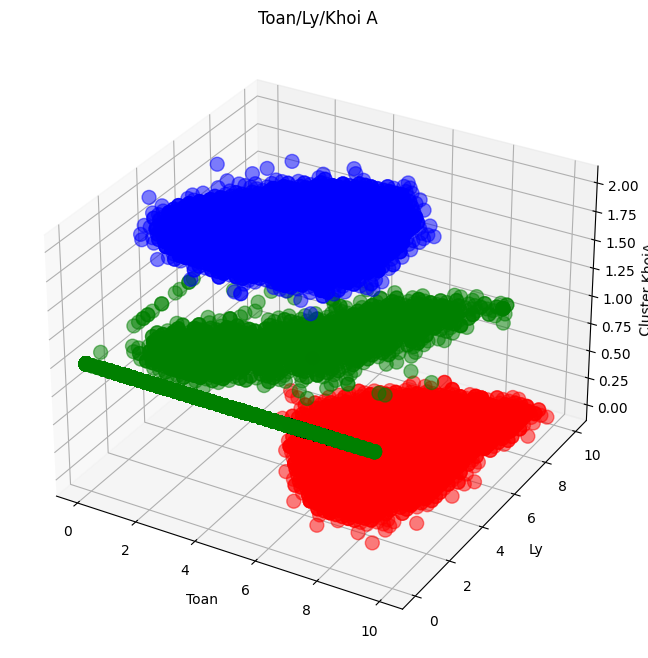

In [41]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Ly")
ax.set_zlabel("Cluster KhoiA")
ax.set_title("Toan/Ly/Khoi A")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
   clustered_data = khoia[khoia['Cluster KhoiA'] == i]
   ax.scatter(clustered_data['Toan'], clustered_data['Ly'], clustered_data['Cluster KhoiA'], c=c, s=100, alpha=0.5)

plt.show()

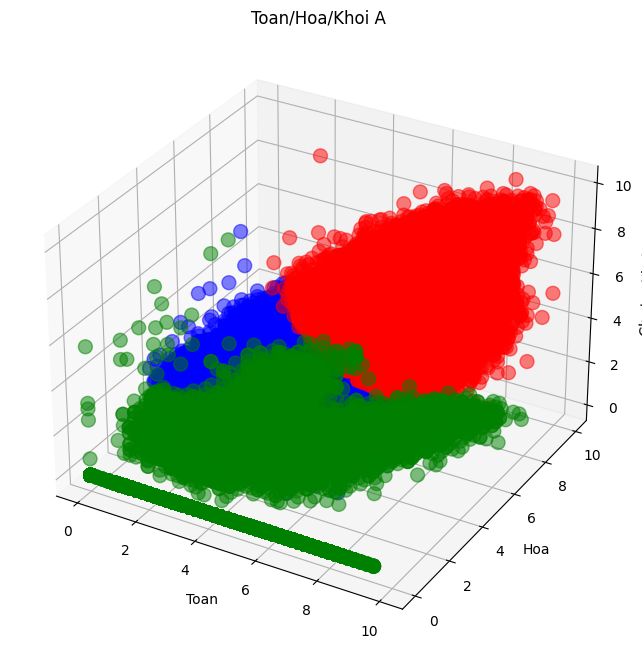

In [42]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Hoa")
ax.set_zlabel("Cluster KhoiA")
ax.set_title("Toan/Ly/Hoa")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
   clustered_data = khoia[khoia['Cluster KhoiA'] == i]
   ax.scatter(clustered_data['Toan'], clustered_data['Hoa'], clustered_data['Ly'], c=c, s=100, alpha=0.5)

plt.show()

**Phân cụm trên khối B**

In [43]:
khoib = data1[['Toan', 'Hoa', 'Sinh', 'KhoiB']]
khoib

,Toan,Hoa,Sinh,KhoiB
0,3.0,0.00,0.00,0.00
1,8.8,0.00,0.00,0.00
2,6.0,5.50,5.00,16.50
3,3.4,0.00,0.00,0.00
4,3.8,0.00,0.00,0.00
...,...,...,...,...
744391,4.6,3.00,3.25,10.85
744392,7.0,5.50,4.00,16.50
744393,5.2,5.50,2.25,12.95
744394,7.8,6.25,3.00,17.05


In [44]:
X_khoib = khoib.values
X_khoib

array([[ 3.  ,  0.  ,  0.  ,  0.  ],
       [ 8.8 ,  0.  ,  0.  ,  0.  ],
       [ 6.  ,  5.5 ,  5.  , 16.5 ],
       ...,
       [ 5.2 ,  5.5 ,  2.25, 12.95],
       [ 7.8 ,  6.25,  3.  , 17.05],
       [ 5.8 ,  4.75,  3.25, 13.8 ]])

In [45]:
clusters_khoib = 3
model_khoib = KMeans(init='k-means++', n_clusters=clusters_khoia, n_init=12)

In [46]:
model_khoib.fit(X_khoib)
labels_khoib = model_khoib.labels_

In [47]:
khoib['Cluster KhoiB'] = labels_khoib
khoib

C:\Users\Duy Long\AppData\Local\Temp\ipykernel_6168\4255389316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoib['Cluster KhoiB'] = labels_khoib


,Toan,Hoa,Sinh,KhoiB,Cluster KhoiB
0,3.0,0.00,0.00,0.00,0
1,8.8,0.00,0.00,0.00,0
2,6.0,5.50,5.00,16.50,1
3,3.4,0.00,0.00,0.00,0
4,3.8,0.00,0.00,0.00,0
...,...,...,...,...,...
744391,4.6,3.00,3.25,10.85,2
744392,7.0,5.50,4.00,16.50,1
744393,5.2,5.50,2.25,12.95,2
744394,7.8,6.25,3.00,17.05,1


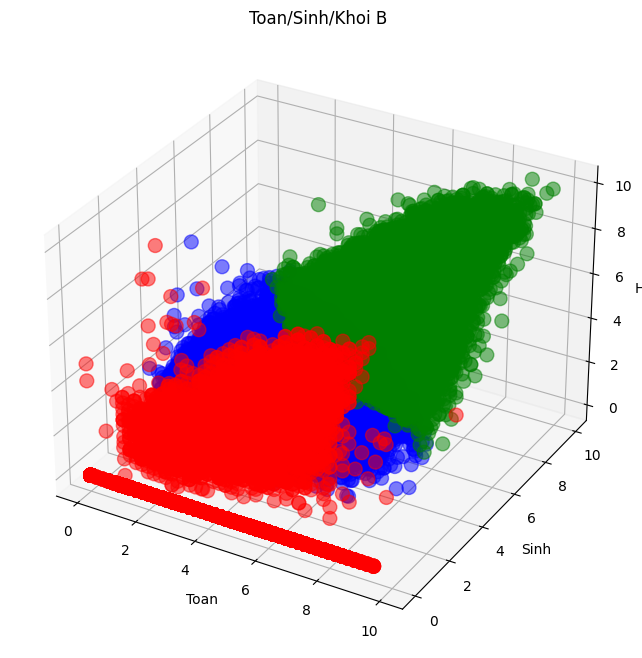

In [49]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Sinh")
ax.set_zlabel("Hoa")
ax.set_title("Toan/Sinh/Khoi B")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
   clustered_data = khoib[khoib['Cluster KhoiB'] == i]
   ax.scatter(clustered_data['Toan'], clustered_data['Sinh'], clustered_data['Hoa'], c=c, s=100, alpha=0.5)

plt.show()

**Phân điểm thi thành 5 cụm tương đương với 5 khối**

In [53]:
phan_khoi = data1.drop(columns=['SoBD','Ma Tinh', 'Ten Tinh', 'Vung mien', 'KhoiA','KhoiB', 'KhoiC', 'KhoiD', 'KhoiA1'])
phan_khoi

,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD
0,3.0,3.75,3.0,0.00,0.00,0.00,3.0,6.50,8.25
1,8.8,7.50,9.0,0.00,0.00,0.00,6.0,9.00,8.25
2,6.0,5.50,4.0,5.75,5.50,5.00,0.0,0.00,0.00
3,3.4,5.75,2.6,0.00,0.00,0.00,3.5,4.75,7.25
4,3.8,6.75,3.0,0.00,0.00,0.00,3.5,6.25,8.00
...,...,...,...,...,...,...,...,...,...
744391,4.6,4.50,6.0,3.75,3.00,3.25,0.0,0.00,0.00
744392,7.0,6.00,5.0,5.25,5.50,4.00,0.0,0.00,0.00
744393,5.2,3.50,4.0,6.25,5.50,2.25,0.0,0.00,0.00
744394,7.8,4.50,5.4,7.50,6.25,3.00,0.0,0.00,0.00


In [54]:
X_phankhoi = phan_khoi.values
X_phankhoi

array([[3.  , 3.75, 3.  , ..., 3.  , 6.5 , 8.25],
       [8.8 , 7.5 , 9.  , ..., 6.  , 9.  , 8.25],
       [6.  , 5.5 , 4.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [5.2 , 3.5 , 4.  , ..., 0.  , 0.  , 0.  ],
       [7.8 , 4.5 , 5.4 , ..., 0.  , 0.  , 0.  ],
       [5.8 , 3.5 , 3.  , ..., 0.  , 0.  , 0.  ]])

In [60]:
clusters_phankhoi = 5
model_phankhoi = KMeans(init='k-means++', n_clusters=clusters_phankhoi, n_init=12)

In [61]:
model_phankhoi.fit(X_phankhoi)
labels_phankhoi = model_phankhoi.labels_

In [62]:
phan_khoi['Khoi Thi'] = labels_phankhoi
phan_khoi

,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,Khoi Thi
0,3.0,3.75,3.0,0.00,0.00,0.00,3.0,6.50,8.25,4
1,8.8,7.50,9.0,0.00,0.00,0.00,6.0,9.00,8.25,1
2,6.0,5.50,4.0,5.75,5.50,5.00,0.0,0.00,0.00,2
3,3.4,5.75,2.6,0.00,0.00,0.00,3.5,4.75,7.25,4
4,3.8,6.75,3.0,0.00,0.00,0.00,3.5,6.25,8.00,1
...,...,...,...,...,...,...,...,...,...,...
744391,4.6,4.50,6.0,3.75,3.00,3.25,0.0,0.00,0.00,3
744392,7.0,6.00,5.0,5.25,5.50,4.00,0.0,0.00,0.00,2
744393,5.2,3.50,4.0,6.25,5.50,2.25,0.0,0.00,0.00,3
744394,7.8,4.50,5.4,7.50,6.25,3.00,0.0,0.00,0.00,2


In [66]:
print(colored(phan_khoi.groupby('Khoi Thi').describe(), attrs=['bold']))

              Toan                                                     Van  \
             count      mean       std  min  25%  50%  75%   max     count   
Khoi Thi                                                                     
0          71556.0  3.294622  1.388417  0.0  2.4  3.2  4.2   9.4   71556.0   
1         165608.0  5.176735  0.983178  0.0  4.6  5.2  5.8   9.4  165608.0   
2         166164.0  6.404990  0.853365  2.2  5.8  6.4  7.0  10.0  166164.0   
3         130846.0  5.151080  1.002576  0.0  4.6  5.2  5.8   9.4  130846.0   
4         210222.0  3.748161  0.994534  0.0  3.0  3.8  4.4   8.2  210222.0   

                    ...   Dia             GDCD                                \
              mean  ...   75%    max     count      mean       std  min  25%   
Khoi Thi            ...                                                        
0         4.044277  ...  5.50  10.00   71556.0  0.057913  0.409286  0.0  0.0   
1         6.618548  ...  7.00  10.00  165608.0  7.95183

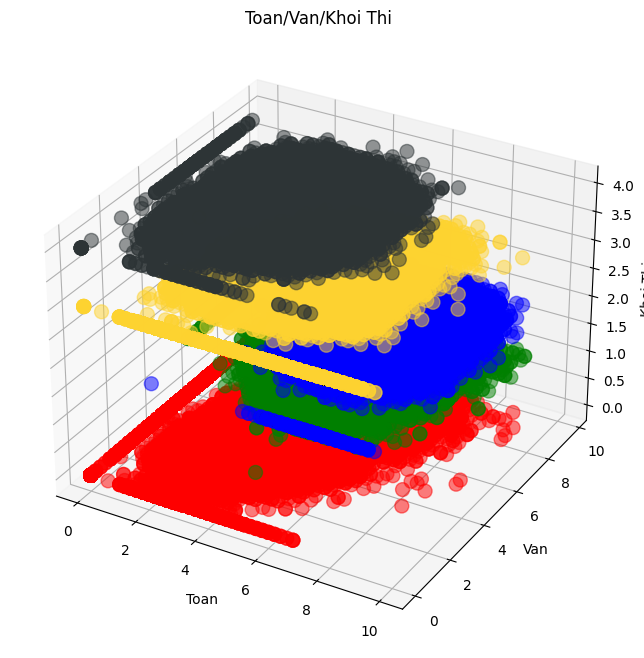

In [65]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Van")
ax.set_zlabel("Khoi Thi")
ax.set_title("Toan/Van/Khoi Thi")

colors = ['r', 'g', 'b','#fed330','#2d3436']

for i, c in enumerate(colors):
   clustered_data = phan_khoi[phan_khoi['Khoi Thi'] == i]
   ax.scatter(clustered_data['Toan'], clustered_data['Van'], clustered_data['Khoi Thi'], c=c, s=100, alpha=0.5)

plt.show()